# Global Drivers of Local Water Stress 
**by Iman Haqiqi, Department of Agricultural Economics, Purdue University**

Second version: October 4, 2024

How to cite: 

Haqiqi, I. (2024). Global Drivers of Local Water Stress. I-GUIDE Platform. (DD-MM-YYYY). https://platform.i-guide.io/notebooks/

Haqiqi, I., Bowling, L., Jame, S., Baldos, U., Liu, J. and Hertel, T., 2023. Global drivers of local water stresses and global responses to local water policies in the United States. Environmental Research Letters, 18(6), p.065007. https://doi.org/10.1088/1748-9326/acd269



### Acknowledgement
This study was supported by: DOE PCHES: The U.S. Department of Energy, Office of Science, Biological and Environmental Research Program, Earth and Environmental Systems Modeling, MultiSector Dynamics under Cooperative Agreement DE-SC0022141; NSF I-GUIDE: The National Science Foundation, Institute for Geospatial Understanding through an Integrative Discovery Environment under award No. HDR-2118329; NSF AccelNet: The National Science Foundation, GLASSNET: OISE-2020635. 


## Abstract
How much of the future stress on groundwater is coming from overseas? This notebook illustrates the projected change in US groundwater withdrawal and decomposes it into the contribution of population, income, technology, and biofuel. The key takeaway is that a significant portion, over half, of the projected future stress on US water resources originates from external factors –  namely, rising incomes and populations overseas and their increased demand for food. Continued technological growth and productivity improvement are necessary to moderate the pressure on local environmental resources. 


## 1. Introduction
Agriculture and food demand are the main drivers of land and water sustainability stress. The increasing global population is a significant factor contributing to the growing demand for food. This can put pressure on US agricultural water resources as exports increase. Additionally, as incomes rise in developing countries, there is a shift towards more water-intensive food options, which can impact global food production patterns. The demand for biofuels also plays a role, as government policies promoting biofuels can lead to changes in land use and crop production patterns, affecting  water use directly and indirectly through international trade adjustments. Finally, advancements in agricultural technologies and practices that improve crop yields can help alleviate water stress by producing more food with less water, reducing pressure on US water resources and land.

### Objective
Measure and illustrate the impacts of global changes on local water resources in the United States.

### Research questions
What is the contribution of global change in population, income, and technology to future water stress in the United States?

## 2. Methods
This question requires a multi-scale framework considering local economic decisions about water use as well as global economic decisions about consumption and trade. 

### Model
SIMPLE-G-Water a gridded economic model of agriculture and environment:
Baldos, U. L. C., Haqiqi, I., Hertel, T. W., Horridge, M., & Liu, J. (2020). SIMPLE-G: A multiscale framework for integration of economic and biophysical determinants of sustainability. Environmental Modelling & Software, 133, 104805.

### Scenario
We take the latest projections of population and income growth from:

IIASA-WiC POP 2023
OECD ENV-Growth 2023
The data is downloaded from:

SSP Scenario Explorer 3.0.1 Release March 2024: https://data.ece.iiasa.ac.at/ssp/#/workspaces/200




<div>
  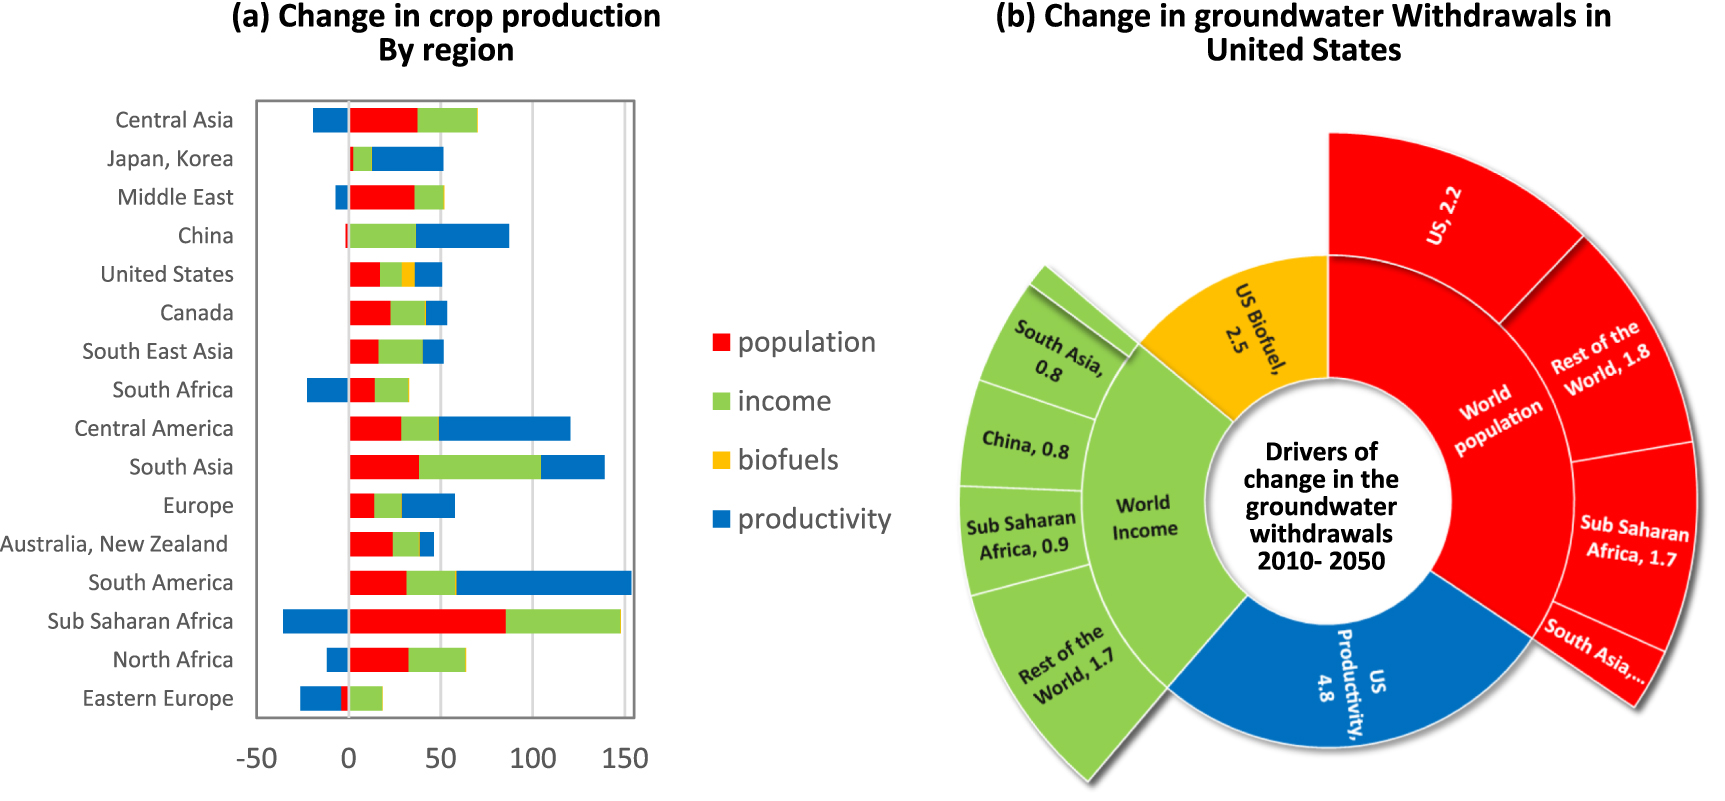
</div>

<div>
  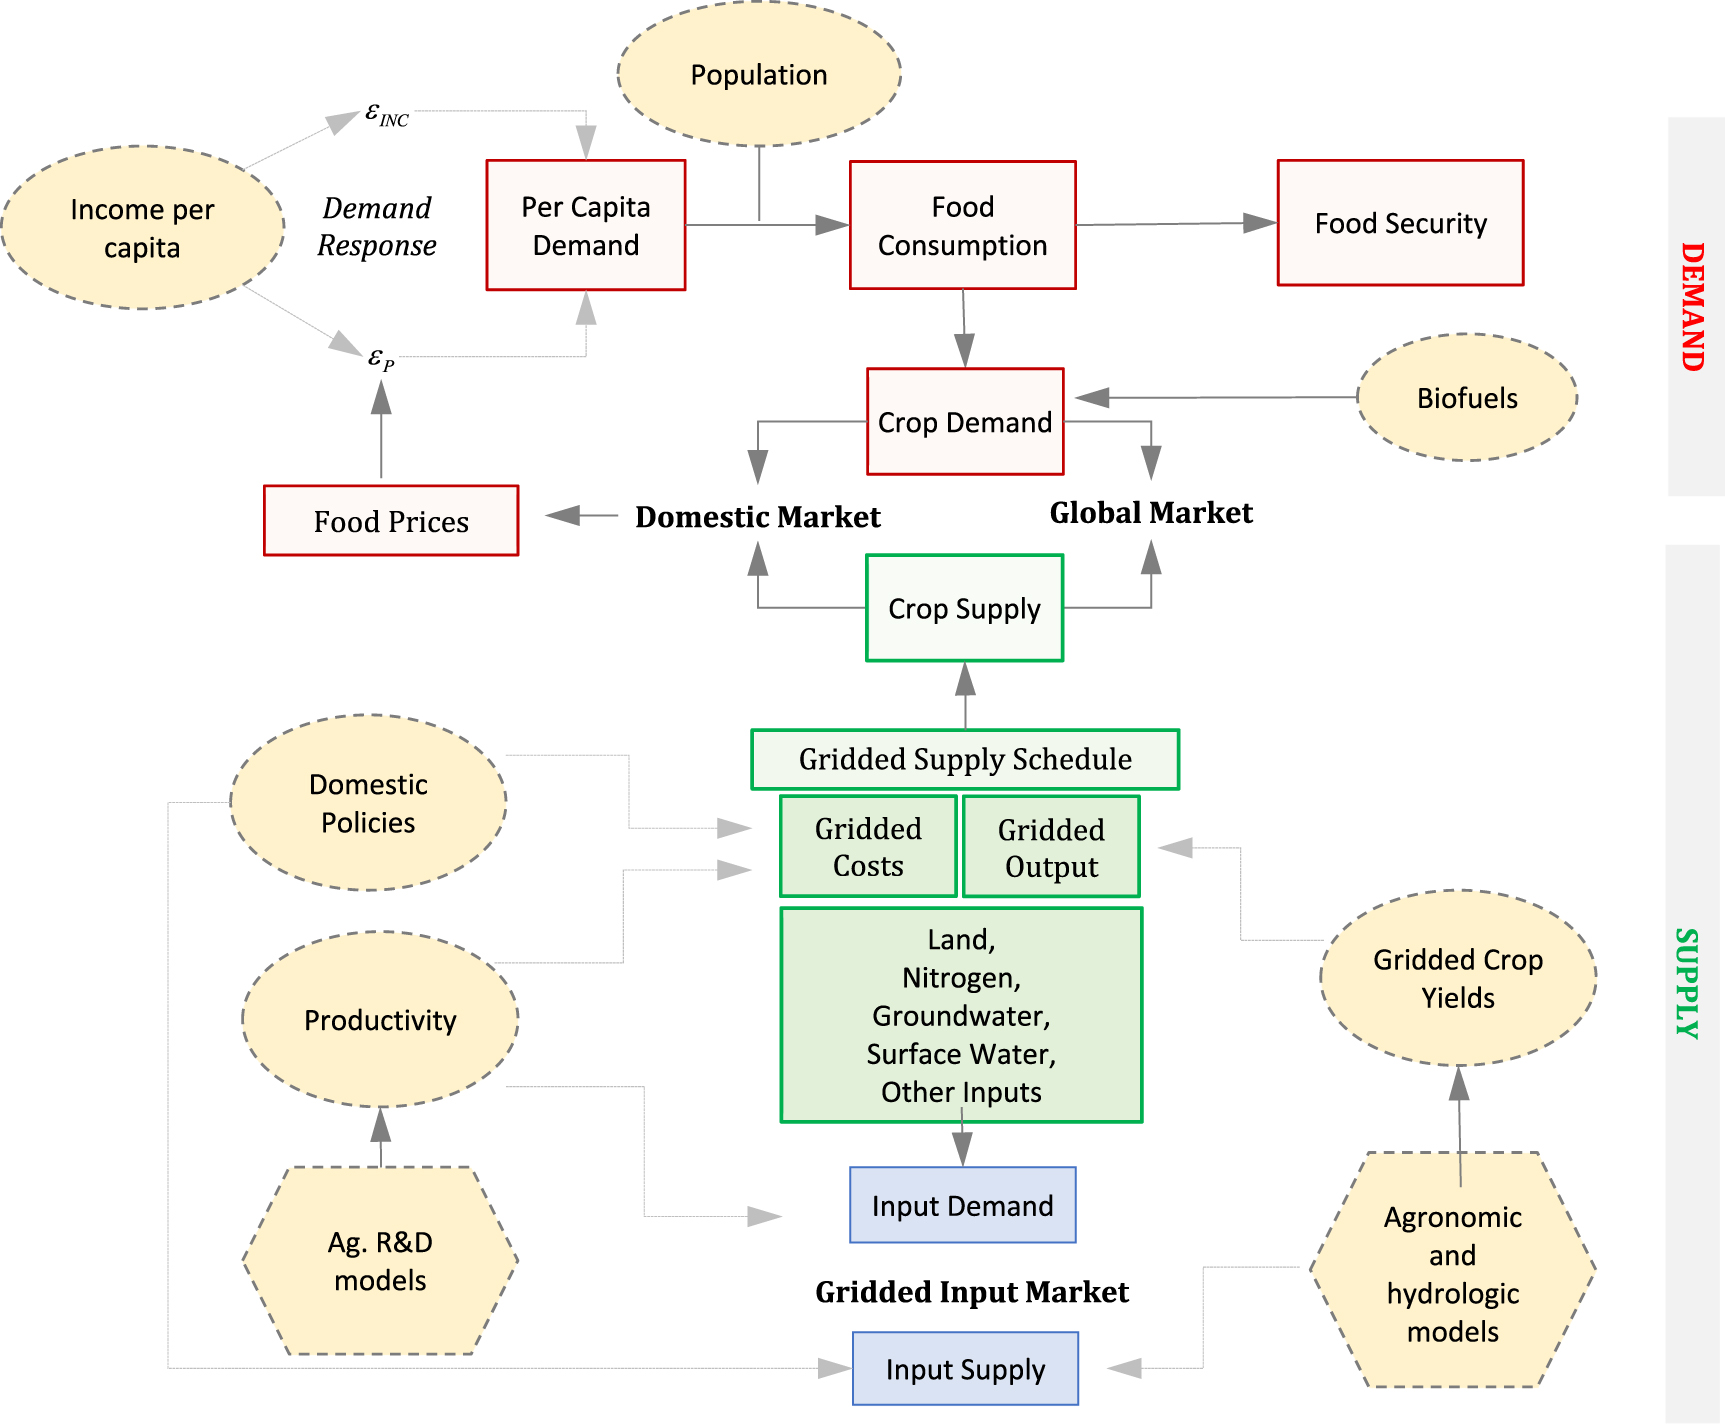
</div>

SIMPLE-G nested structure here

### Data and Scenarios 
We take the latest projections of population and income growth from:
- IIASA-WiC POP 2023
- OECD ENV-Growth 2023


The data is downloaded from:
- SSP Scenario Explorer 3.0.1 Release March 2024: https://data.ece.iiasa.ac.at/ssp/#/workspaces/200



In [1]:
library(plotly)
library(crosstalk)

Warning message:
“package ‘plotly’ was built under R version 4.3.2”
Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [2]:
my.file <- "in/simpleg_out_pct.txt"

# read original output file
my.lines <- readLines(my.file)

# Use grep to filter lines starting with "I" or "S"
my.filter <- grep("^[Ip]", my.lines, invert = F)

# Read the filtered lines
new.lines <- my.lines[my.filter]

# Save a temporary file
tmp.file <-  "tmp/simpleg.txt" 
writeLines(new.lines, tmp.file, sep="\n")

# read the US gridded data 
df = read.csv(tmp.file, header=T, sep=",")
colnames(df)[1] <- "GRID"
df = df[1:75651,]

head(df)


GRID   LON    LAT  QLand_i     QLand_r    QCROP_i  QCROP_r  QNitro_i 
1 I00001 -14935 5135 -0.18464348  2.0129657 23.98412 54.18409  5.616197
2 I00002 -14935 5145 -0.07432098  2.1115625 23.88839 54.28460  5.535464
3 I00003 -14925 5095  0.31353161 -0.3133934 40.99900 51.80003 19.956335
4 I00004 -14925 5155  0.27967608 -0.2795155 43.86748 60.58541 22.372152
5 I00005 -14925 5165 -0.09246120  2.5990596 24.81419 63.37474  6.316208
6 I00006 -14925 5175 -0.07207876  2.6175961 24.84772 63.39254  6.344487
  QNitro_r QWATGRD   QWATSRF   QWATER    QWEQPT   
1 31.05689  4.688324  4.556236  4.667476  5.707108
2 31.14147  4.192900  4.075040  4.174340  5.101429
3 29.05046 12.731208 12.430538 12.683795 14.814003
4 36.44273 14.487659 14.142969 14.454692 16.878635
5 38.78891  4.606001  4.476282  4.593664  5.606423
6 38.80390  4.626777  4.496460  4.614318  5.631831

## 3. Results
Here, we plot the data.

Note 1. The old versions of the model report the coordinates (the longitude and latitude) multiplied by 120. so we need to divide by 120 to get the correct coordinates.

Note 2. We truncate to 500 for visualization purposes.

Note 3. Note that the scenario does not consider climate change.


In [1]:
library(plotly)
library(crosstalk)

Warning message:
“package ‘plotly’ was built under R version 4.3.2”
Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [2]:
my.file <- "in/simpleg_out_pct.txt"

# read original output file
my.lines <- readLines(my.file)

# Use grep to filter lines starting with "I" or "S"
my.filter <- grep("^[Ip]", my.lines, invert = F)

# Read the filtered lines
new.lines <- my.lines[my.filter]

# Save a temporary file
tmp.file <-  "tmp/simpleg.txt" 
writeLines(new.lines, tmp.file, sep="\n")

# read the US gridded data 
df = read.csv(tmp.file, header=T, sep=",")
colnames(df)[1] <- "GRID"
df = df[1:75651,]

head(df)

GRID   LON    LAT  QLand_i     QLand_r    QCROP_i  QCROP_r  QNitro_i 
1 I00001 -14935 5135 -0.18464348  2.0129657 23.98412 54.18409  5.616197
2 I00002 -14935 5145 -0.07432098  2.1115625 23.88839 54.28460  5.535464
3 I00003 -14925 5095  0.31353161 -0.3133934 40.99900 51.80003 19.956335
4 I00004 -14925 5155  0.27967608 -0.2795155 43.86748 60.58541 22.372152
5 I00005 -14925 5165 -0.09246120  2.5990596 24.81419 63.37474  6.316208
6 I00006 -14925 5175 -0.07207876  2.6175961 24.84772 63.39254  6.344487
  QNitro_r QWATGRD   QWATSRF   QWATER    QWEQPT   
1 31.05689  4.688324  4.556236  4.667476  5.707108
2 31.14147  4.192900  4.075040  4.174340  5.101429
3 29.05046 12.731208 12.430538 12.683795 14.814003
4 36.44273 14.487659 14.142969 14.454692 16.878635
5 38.78891  4.606001  4.476282  4.593664  5.606423
6 38.80390  4.626777  4.496460  4.614318  5.631831

In [3]:
df$LON = df$LON/120
df$LAT = df$LAT/120

dat = df[-c(1:3)]
dat[dat > +500] = +500
dat[dat < -500] = -500

df= cbind(df[c(1:3)], dat)


### 3.1. Map of the projected changes
The following map shows the % change projected for 2010-2050 fro the following variables:
- QLand_i: cropland area, irrigated
- QLand_r: cropland area, rainfed
- QCROP_i: crop production, irrigated
- QCROP_r: crop production, rainfed
- QNitro_i: nitrogen fertilizer application, irrigated
- QNitro_r: nitrogen fertilizer application, rainfed
- QWATGRD: irrigation groundwater withdrawals
- QWATSRF: irrigation surface water withdrawals
- QWATER: irrigation total water withdrawals
- QWEQPT: irrigation equipment


<h4 style="color:red;"> Note: Generating the figure in this next cell may take a minute. </h4>

In [ ]:
lab = names(df)

main.col = "QCROP_i"

main.var = subset(df, select = main.col)
main.var = main.var[,1]

info.box = paste(
                 "\n ", lab[1 ], ": ", df[,1 ],
                 "\n ", lab[4 ], ": ", round(df[,4 ], 3),
                 "\n ", lab[5 ], ": ", round(df[,5 ], 3),
                 "\n ", lab[6 ], ": ", round(df[,6 ], 3),
                 "\n ", lab[7 ], ": ", round(df[,7 ], 3),
                 "\n ", lab[8 ], ": ", round(df[,8 ], 3),
                 "\n ", lab[9 ], ": ", round(df[,9 ], 3),
                 "\n ", lab[10], ": ", round(df[,10], 3),
                 "\n ", lab[11], ": ", round(df[,11], 3),
                 "\n ", lab[12], ": ", round(df[,12], 3)
                 )

fig = plot_ly(df, x = df$LON, y = df$LAT, z=df$QLand_i, text = info.box, type = "heatmap",width=8,height=4) 

fig <- fig %>% layout(
    title = "The grid ID and percentage change in variables",
    xaxis = list(title = "lon"),
    yaxis = list(title = "lat"),
    updatemenus = list(
      list(
        y = 0.8,
        buttons = list(

          list(method = "restyle",
               args = list("z", list(df[,4])),
               label = names(df)[4]),

          list(method = "restyle",
               args = list("z", list(df[,5])),
               label = names(df)[5]),

          list(method = "restyle",
               args = list("z", list(df[,6])),
               label = names(df)[6]),

          list(method = "restyle",
               args = list("z", list(df[,7])),
               label = names(df)[7]),

          list(method = "restyle",
               args = list("z", list(df[,8])),
               label = names(df)[8]),

          list(method = "restyle",
               args = list("z", list(df[,9])),
               label = names(df)[9]),

          list(method = "restyle",
               args = list("z", list(df[,10])),
               label = names(df)[10]),

          list(method = "restyle",
               args = list("z", list(df[,11])),
               label = names(df)[11]),

          list(method = "restyle",
               args = list("z", list(df[,12])),
               label = names(df)[12]),
          
          list(method = "restyle",
               args = list("z", list(df[,3])),
               label = names(df)[3])))

    ))

fig

### 3.2. Decomposing the Contribution of Distant Forces


A crucial feature of SIMPLE-G is the ability to decompose complex phenomena into contributing factors. Decomposition refers to the process of breaking down complex economic changes into driver contribution components. This decomposition analysis allows us to isolate the individual and interactive effects of various drivers on the system being modeled. For instance, in the context of agriculture, these models might decompose the changes in crop production into "subtotals". These subtotals could represent the impact of factors like population growth, income shifts, technological advancements, and climate change. This not only aids in identifying the most significant drivers but also empowers policymakers to formulate targeted interventions that address specific aspects of the challenge. 




#### select a grid cell by ID
Note 4. We dropped the negative contributions to be able to plot them in the sunburst plot.

To run this section, simply choose a grid cell using the previous map. The IDs are from I00001 to I75650.


In [5]:

# Select a grid using above map; enter the ID here:
grid.id = "I56033"

# Read the subtotal dataset for all the conus
# The default file is subtotal_data.csv from SSP2 v2
all.grids = read.csv("in/subtotal_data.csv", header =T)

# Extract data for the selected grid cell
my.grid   = subset(all.grids, GID == grid.id)

# Read the subtotal branch relationships
subtotal_ids = read.csv("in/subtotal_ids.csv", header =T)

# Create a dataframe with ids and labels of the subtotals
values =  as.numeric(my.grid[,-1])

# Remove the negatives for the sunburst figure, 
values[values < 0] = 0

# The ids are defines in SIMPLE-G subtotal 
ids =  subtotal_ids$ids

# The labels will be shown on the figure
labels = subtotal_ids$labels

# Define relationship between the subtotals
parents = subtotal_ids$parents

# put together the dataframe
data <-   
  data.frame(
    ids     = ids,
    labels  = labels,
    parents = parents,
      v0  = values) 

data


ids     labels  parents v0    
1  TOT     TOT             31.544
2  BIO     BIO     TOT      6.148
3  POP     POP     TOT     14.386
4  INC     INC     TOT     11.010
5  pop_EUR pop_EUR POP      0.000
6  pop_SAM pop_SAM POP      1.530
7  pop_NAM pop_NAM POP      4.974
8  pop_AFR pop_AFR POP      4.512
9  pop_JKA pop_JKA POP      0.000
10 pop_OTH pop_OTH POP      2.818
11 inc_EUR inc_EUR INC      0.306
12 inc_SAM inc_SAM INC      1.015
13 inc_NAM inc_NAM INC      0.365
14 inc_AFR inc_AFR INC      2.718
15 inc_JKA inc_JKA INC      0.027
16 inc_OTH inc_OTH INC      2.345
17 p_01    E_Euro  pop_EUR  0.000
18 p_02    N_Afr   pop_AFR  0.635
19 p_03    SSA     pop_AFR  3.838
20 p_04    S_Amer  pop_SAM  0.910
21 p_05    AUS_NZ  pop_JKA  0.097
22 p_06    EU      pop_EUR  0.003
23 p_07    S_Asia  pop_OTH  1.325
24 p_08    CC_Amer pop_SAM  0.620
25 p_09    S_Afr   pop_AFR  0.039
26 p_10    SE_Asia pop_OTH  1.178
27 p_11    CAN     pop_NAM  0.145
28 p_12    US      pop_NAM  4.828
29 p_13    CHN_MNG pop_OTH  0.000
30 p_14    M_East  pop_OTH  1.487
31 p_15    JPN_KR  pop_JKA  0.000
32 p_16    C_Asia  pop_OTH  0.153
33 i_01    E_Euro  inc_AFR  0.224
34 i_02    N_Afr   inc_EUR  0.443
35 i_03    SSA     inc_AFR  2.213
36 i_04    S_Amer  inc_SAM  0.731
37 i_05    AUS_NZ  inc_JKA  0.005
38 i_06    EU      inc_EUR  0.083
39 i_07    S_Asia  inc_OTH  2.000
40 i_08    CC_Amer inc_SAM  0.284
41 i_09    S_Afr   inc_AFR  0.061
42 i_10    SE_Asia inc_OTH  1.866
43 i_11    CAN     inc_NAM  0.001
44 i_12    US      inc_NAM  0.364
45 i_13    CHN_MNG inc_OTH  2.233
46 i_14    M_East  inc_OTH  0.332
47 i_15    JPN_KR  inc_JKA  0.022
48 i_16    C_Asia  inc_OTH  0.147

#### Select the Regions to be Included
In this section, we will be focusing on recalculating the total and subtotal values derived from subtotal values reported by SIMPLE-G. This process is essential to ensure the accuracy of our data, and it involves re-evaluating the values after eliminating any negative numbers. 

Additionally, we will be dropping some regions with small contributions to make the figure more visually appealing and easier to interpret with a clearer and more accurate representation of the data, which is important for communicating the results.

In [6]:
sub.sub.tot.rows = c(5:16)
data$v1 =  data$v0
for (i in sub.sub.tot.rows) {
    # Recalculate the sum for sub.sub.tot for the entire data frame
    data$v1[i] <- sum(data$v0[which(data$parents == data[i, "ids"])], na.rm=T)
  }

sub.tot.rows = c(3:4)
data$v2 =  data$v1
for (i in sub.tot.rows) {
  # Recalculate the sum for sub.tot for the entire data frame
  data$v2[i] <- sum(data$v1[which(data$parents == data[i, "ids"])], na.rm=T)
}

tot.rows = c(1)
data$v3 =  data$v2
for (i in tot.rows) {
  # Recalculate the sum for tot for the entire data frame
  data$v3[i] <- sum(data$v2[which(data$parents == data[i, "ids"])], na.rm=T)
}

data$values = data$v3 

# exclude some of the sub.sub.totals
data = subset(data, values > 0.1)
data = subset(data, parents != "pop_SAM")
data = subset(data, parents != "pop_NAM")
data = subset(data, parents != "pop_JKA")
data = subset(data, parents != "pop_EUR")

data = subset(data, parents != "inc_SAM")
data = subset(data, parents != "inc_NAM")
data = subset(data, parents != "inc_JKA")
data = subset(data, parents != "inc_EUR")

# creat a sunburts plot
my.plot <- plot_ly(
  data = data,
  ids = ~ ids,
  labels = ~ labels,
  parents = ~ parents,
  values = ~ values,
  branchvalues = "total",
  type = "sunburst"
)
my.plot

HTML widgets cannot be represented in plain text (need html)

This figure shows the key drivers that impact water resources. The major drivers that influence water demand are population, income, and biofuel usage. It is important to note that the contribution of each driver varies across different regions of the world. Therefore, the figure highlights the relative contribution of each driver in different global regions. 

Additionally, the branches of the figure vary in size, which is an indicator of the relative importance of each country-driver. If we take this grid cell as an example, we can observe that the countries with the most significant impact on water resources are SSA, China, and South Asia. These countries are responsible for a larger proportion of water demand changes compared to other regions of the world for this location. 


### Important Note:

It's important to note that in the exercise analysis, we have not factored in the potential effects of climate change and productivity growth. These factors have the ability to significantly impact the pressure exerted by income and population growth. For instance, climate change may accelerate resource depletion, intensify competition for resources, and exacerbate environmental degradation. On the other hand, productivity growth may lead to more efficient use of resources, less waste, and reduced environmental impact. It's important to consider these factors when assessing the sustainability of future economic growth.

## Data Availability
The SIMPLE-G output for SSP v3 population and income growth are available at myGeohub.
https://mygeohub.org/members/4069/contributions?area=publications



## 4. Final remark
The study shows the significant impact of population and income changes in other countries on US water resources. The importance of technological growth and increased productivity in mitigating these pressures cannot be overstated. 

While it is crucial to study virtual water export, we must also acknowledge that the US heavily relies on importing valuable natural resources embedded in commodities from other countries. Our consumption patterns often lead to environmental stresses and pressures in foreign nations. Thus, we must adopt a comprehensive global-to-local-to-global approach to address sustainability challenges. 



## 5. Readings and References

Baldos, U.L.C., Haqiqi, I., Hertel, T.W., Horridge, M. and Liu, J., 2020. SIMPLE-G: A multiscale framework for integration of economic and biophysical determinants of sustainability. Environmental Modelling & Software, 133, p.104805. https://doi.org/10.1016/j.envsoft.2020.104805 

Fraysse, E.A., Hertel, T.W., Wang, Z. and Haqiqi, I., 2023. SIMPLE-G In the Classroom and the Cloud. Forum 2023, Harnessing the Geospatial Data Revolution for Sustainability Solutions, October 4 – 6, Columbia University, New York. https://doi.org/10.5703/1288284317668  

Haqiqi, I., Bowling, L., Jame, S., Baldos, U., Liu, J. and Hertel, T., 2023a. Global drivers of local water stresses and global responses to local water policies in the United States. Environmental Research Letters, 18(6), p.065007. https://doi.org/10.1088/1748-9326/acd269 

Haqiqi, I., Grogan, D.S., Bahalou Horeh, M., Liu, J., Baldos, U.L., Lammers, R. and Hertel, T.W., 2023b. Local, regional, and global adaptations to a compound pandemic-weather stress event. Environmental Research Letters, 18(3), p.035005. https://doi.org/10.1088/1748-9326/acbbe3 

Haqiqi, I., Perry, C.J. and Hertel, T.W., 2022. When the virtual water runs out: local and global responses to addressing unsustainable groundwater consumption. Water International, 47(7), pp.1060-1084. https://doi.org/10.1080/02508060.2023.2131272  

Hertel, T.W. and Baldos, U.L.C., 2016. Global change and the challenges of sustainably feeding a growing planet (p. 22). New York: Springer.

Hertel, T.W., 2011. The global supply and demand for agricultural land in 2050: A perfect storm in the making?. American journal of agricultural Economics, 93(2), pp.259-275.

Hertel, T.W., Baldos, U.L.C. and van der Mensbrugghe, D., 2016. Predicting long-term food demand, cropland use, and prices. Annual Review of Resource Economics, 8, pp.417-441.

Kabir, K., Baldos, U.L.C. and Hertel, T.W., 2023. The new Malthusian challenge in the Sahel: prospects for improving food security in Niger. Food Security, 15(2), pp.455-476. https://doi.org/10.1007/s12571-022-01319-3 

Liu, J., Hertel, T.W., Lammers, R.B., Prusevich, A., Baldos, U.L.C., Grogan, D.S. and Frolking, S., 2017. Achieving sustainable irrigation water withdrawals: global impacts on food security and land use. Environmental Research Letters, 12(10), p.104009. https://doi.org/10.1088/1748-9326/aa88db 

Loduca, Natalie R., Haqiqi, I., Liu, J., and Reeling, C. 2020. How Scale and Scope of Ecosystem Markets Impact Permit Trading: Evidence from Partial Equilibrium Modeling in the Chesapeake Bay Watershed. Agricultural & Applied Economics Association Annual Meeting, Virtual. August 10-1. https://doi.org/10.22004/ag.econ.304319 

Ray, S., Haqiqi, I., Hill, A.E., Taylor, J.E. and Hertel, T.W., 2023. Labor markets: A critical link between global-local shocks and their impact on agriculture. Environmental Research Letters, 18(3), p.035007. https://doi.org/10.1088/1748-9326/acb1c9 

Sun, S., Ordonez, B.V., Webster, M.D., Liu, J., Kucharik, C.J. and Hertel, T., 2020. Fine-scale analysis of the energy–land–water nexus: nitrate leaching implications of biomass cofiring in the Midwestern United States. Environmental science & technology, 54(4), pp.2122-2132.

Woo, J., Zhao, L., Grogan, D.S., Haqiqi, I., Lammers, R. and Song, C.X., 2022. C3F: collaborative container-based model coupling framework. In Practice and Experience in Advanced Research Computing (pp. 1-8). DOI: 10.1145/3491418.3530298 